## Step 1: Browse

Skim all transcripts and record first impressions.

In [98]:
import json
import csv
import pandas as pd
import re
import seaborn as sns

In [12]:
# loading raw data
p_ids = ["PA", "PB", "PC", "PE", "PF", "PG", "PH", "PJ", "PK", "PM", "PN", "PI", "PO"]
raw_data = {}
for p_id in p_ids:
    with open("../data/transcripts/{}/{}.txt".format(p_id, p_id), "r") as infile:
        raw_data[p_id] = infile.read()

### First impressions
These are some first impressions which are not organised by theme.
- Agile misrepresentation
    + Negative assosiations and possible misunderstanding/lack of knowledge surrounding agile PM (PC)
    + Bad past experience working in agile environment (PF)
- Stakeholder analysis
    + Does the PM tend to have less power and influence than you'd typically find in an industry project? 
    + Do developers have more power and less accountability?
- Team models
    + Likely to encounter disparate teams ('sharded teams') which are really sub-teams and not really related to one another (e.g. collaborating institutions)
    + Teams with absent PI and/or PM ('leaderless teams'). Original grant writer may not be involved.
    + Teams where PhDs essentially work independently 'not-really-a-team team'
    + PH interacted less as an academic than they do in their role as a laboratory engineer
    + Individuals contributing to different repos
    + The PI isn't necessarily the best manager. Give roles based on experience and competence, not hierarchy.
    + Some evidence major decisions made by individuals without consulting a team (PF)
    + Some teams recruited on dev experience, others on research familiarity or personal connection/convenience (i.e. PhD students, post-docs). Depending on the project and its aims, the latter approach may be ill-advised.
    + The power developers have might become inflated, particularly when their role in the research is blurred. Typically devs will have high interest lower power, whereas a PM and SME will have both high power and interest. Without formal PM structure the devs will tend to hold more power.
- Values
    + Open-source is important. Monetisation (of software) is not normally a consideration. Software more of a by-product than a commodity?
    + To think critically about collaborative working and processes does not seem to come naturally. They tended to use positive language about the projects and regarded them as successful.
    + Tendency not to think too much about process. PA notes the contrast when an industry PM was involved ('proper release process', 'understanding requirements', 'respect for working in teams') PN seems to suggest that the details matter much. On a large project it's possible to spin it in a positive light, whereas each increment of work is not open to scrutiny.
    + How well a cross-partnership team functions does not seem to be a factor in relation to future funding. Is there an incentive to establish effective long-term partnerships?
    + Develop to a point and then handover to a commerical partner or create spinoff. Sense that anything long-term or viable as an end product is futile. Support research, not income generating.
    + Motivated by desire to do good work with other experts (PE, PC).
    + Motivated by desire to learn, collaborate and write papers. Doesn't want to manage or be a business brain (PE)
    + Not much motivation to challenge processes. The fact they will typically receive 'excellent' with no detailed feedback at the end of the project won't help to encourgae this mindset.
- Challenges
    + WPs designed up front by someone who may be wholly absent after sign-off
    + Deliverables may be very loosely defined (exploratory research)
    + Project may consist of teams who are working on different WPs that really have very little to do with one another
    + There may be virtually no collaboration there post-award. They may develop independent incompatible software.
    + Related to previous, seems difficult for multiple projects to result in a shared infrastructure
    + Post-Docs just off PhD may be used to being 'free')
    + Decisions being made by one person and not open to being challenged (e.g. choice of development language)
    + Managing cost of context change when working on several projects or juggling teaching commitments
    + An entire project may be founded (more-or-less) on an assumption because it isn't possible to prototype first
    + Turning the desire to make tools people will find useful into research - is it hard to fund otherwise?
    + Making software sustainable. Make decisions assuming someone else will take this on after you. Avoiding dependencies. Reliable, scable infrastructure.
    + Engaging SMEs seems to be a challenge. Hard to uncover and align interests. Perhaps a collaborator should not be chosen unless there is a clear alignment there? (PN)
    + Working with startups may make partner engagement easier in some instances as they have more to gain? (PO)
    + Funding ongoing maintenence. Grants too short-term. Need a collaborative approach to keep useful projects alive? (PF,PC)
    + Difficult to make comparisons as projects tended to meet acceptance criteria, although that throws up some interesting questions (things have to look good on paper).
    + Greater commitment and accountability needed to ensure short-term goals are met/tasks completed on time. Suggestion this relates to having clearly defined tasks with due dates and commitment to deliver. When people don't interact frequently or there is no personal connection, it is harder to generate that sense of responsibility/urgency. (PK, PO)
- Tools and processes
    + Tools are used for reporting and tracking issues and bugs, version control also common
    + Not much evidence of planned processes. Typically organic, ad-hoc. Progress tracking/task management tools seldom reported although KANBAN was mentioned a couple of times.
    + Testing is not mentioned that frequently. Testing is thought to be the number one form of quality control.
- Domain-specific observations    
    + In field of maths, algorithms and software is where the research has impact.
    + In science, everyone has to write scripts. Differentiates between scripts and software (PN)
- Quantifying success
    + Inherently difficult. Once a project makes it through the application process and is 'approved' for funding, it cannot really fail. Depending  on the funding source and PO there may be more or less scrutiny of the deliverables, but if it makes it to completion it is essentially successful.
    + Projects no longer graded yet multiples participants reported having 'excellent' grades. Suspect this doesn't mean an awful lot?
    + There is no unified metric for success. There are various we can look at but they cannot be applied consistently across projects (things like follow-up funding aren't always applicable). Hence subjective interpretations and 'reading between the lines' is probably the best measure we can get. I will create a composite success metric and I expect they will all come out relatively high.
- Review process
    + Viewed as a positive, important process though not without problems. There was a general sense that the more rigourous review process of an EU project benefited the projects, as opposed to the more relaxed review process associated with UKRI funded projects.
    + Reviewers not critical enough / not enough attention to detail / interested in different things. Possibly related to the fact WPs are lengthy, reviews infrequent, so there is potential for detail to be neglected.
    + Inconsistent / unpredictable 'auditors'. Possibly related to the experience level of the PO, but sometimes their impartiality was questioned (PC).
    + Some need to separate general project process from software project process and understand the relation?

## Step 2: Read and annotate each transcript

Annotate transcripts with labels (aka 'codes'). These may be actions, activities, concepts, differences, opinions, processes, or whatever I think is relevant. This is known as the 'cutting and sorting' method (Ryan and Bernard)

In [13]:
def find_loc_of_string(string, text):
    """ find location of a specific phrase
    """
    return re.search(string, text).span()[0]

In [14]:
# manually add rows to this data set rather than annotate text files
codes = [
    ("reviewers", "C", find_loc_of_string("reviewer", raw_data["PC"])),
    ("interaction", "H", find_loc_of_string("interaction", raw_data["PH"])),
    ("software engineering background", "A", find_loc_of_string("consultant", raw_data["PA"])),
    ("RSE or similar role", "A", find_loc_of_string("software architect", raw_data["PA"])),
    ("development process", "A", find_loc_of_string("proper process", raw_data["PA"])),
    ("working software", "A", find_loc_of_string("demonstration of the software", raw_data["PA"])),
    ("changing requirements", "A", find_loc_of_string("requirements tend to change", raw_data["PA"])),
    ("agile process", "A", find_loc_of_string("agile", raw_data["PA"])),
    ("project manager", "A", find_loc_of_string("technical project manager", raw_data["PA"])),
    ("split between projects", "A", find_loc_of_string("40%", raw_data["PA"])),
    ("hands-off PI", "A", find_loc_of_string("Reporting back to the pi", raw_data["PA"])),
    ("PM role ambiguous", "A", find_loc_of_string("loose before in terms of", raw_data["PA"])),
    ("inexperienced PM", "A", find_loc_of_string("bit of a flaw", raw_data["PA"])),
    ("unstructured meetings", "A", find_loc_of_string("rabbit holes", raw_data["PA"])),
    ("partner involvement", "A", find_loc_of_string("planning involvement", raw_data["PA"])),
    ("reference to proposal", "A", find_loc_of_string("served its purpose", raw_data["PA"])),
    ("requirements specification", "A", find_loc_of_string("requirement spec was that part", raw_data["PA"])),
    ("software documentation", "A", find_loc_of_string("documentation for software", raw_data["PA"])),
    ("not much involved with reporting", "A", find_loc_of_string("led by the project", raw_data["PA"])),
    ("transparency", "A", find_loc_of_string("Trello", raw_data["PA"])),
    ("flexible work patterns", "A", find_loc_of_string("was a bit flexible", raw_data["PA"])),
    ("cost of context change", "A", find_loc_of_string("can be very expensive", raw_data["PA"])),
    ("schedule interactions", "A", find_loc_of_string("interactions with other projects", raw_data["PA"])),
    ("scheduling", "A", find_loc_of_string("estimated effort", raw_data["PA"])),
    ("prestigious event", "A", find_loc_of_string("we presented the", raw_data["PA"])),
    ("secured futher funding", "A", find_loc_of_string("follow-on funding", raw_data["PA"])),
    ("low engagement from partners", "A", find_loc_of_string("low engagement", raw_data["PA"])),
    ("human resources", "A", find_loc_of_string("her further developer", raw_data["PA"])),
    ("more time", "A", find_loc_of_string("two years for", raw_data["PA"])),
    ("inexperienced PM", "A", find_loc_of_string("lot more experience in", raw_data["PA"])),
    ("no feedback on deliverables", "A", find_loc_of_string("I haven't heard any feedback", raw_data["PA"])),
    ("not actively maintained", "B", find_loc_of_string("isn't really being actively", raw_data["PB"])),
    ("small team", "B", find_loc_of_string("I'm the main developer", raw_data["PB"])),
    ("ambiguous UX process", "B", find_loc_of_string("actively interview", raw_data["PB"])),
    ("PI absent", "B", find_loc_of_string("He left to go", raw_data["PB"])),
    ("founded on assumption", "B", find_loc_of_string("necessarily interrogating", raw_data["PB"])),
    ("hard to manage partners", "B", find_loc_of_string("slightly hard to", raw_data["PB"])),
    ("agile process", "B", find_loc_of_string("feedback get ready", raw_data["PB"])),
    ("disparate teams", "B", find_loc_of_string("different things to different people", raw_data["PB"])),
    ("integration between partners", "B", find_loc_of_string("might get integrated", raw_data["PB"])),
    ("not involved with reporting", "B", find_loc_of_string("very little involvement", raw_data["PB"])),
    ("PI high-level goals", "B", find_loc_of_string("day-to-day of it", raw_data["PB"])),
    ("face-to-face interactions", "B", find_loc_of_string("in the beginning", raw_data["PB"])),
    ("disparate teams", "B", find_loc_of_string("totally separate", raw_data["PB"])),
    ("redoing work", "B", find_loc_of_string("start from scratch", raw_data["PB"])),
    ("inspection", "B", find_loc_of_string("weekly code reviews", raw_data["PB"])),
    ("communication", "B", find_loc_of_string("email every morning", raw_data["PB"])),
    ("accountability", "B", find_loc_of_string("add some accountability", raw_data["PB"])),
    ("shared view of work", "B", find_loc_of_string("Gantt charts the don't", raw_data["PB"])),
    ("collaboration less flexibility", "B", find_loc_of_string("doing my own thing", raw_data["PB"])),
    ("industry experience", "B", find_loc_of_string("full-time programmer", raw_data["PB"])),
    ("bad experience of agile", "B", find_loc_of_string("shortening the Sprint", raw_data["PB"])),
    ("unofficial PM", "B", find_loc_of_string("corralling people together", raw_data["PB"])),
    ("less focus on quality", "B", find_loc_of_string("quality assurance", raw_data["PB"])),
    ("software engineering background", "C", find_loc_of_string("freelance software engineer", raw_data["PC"])),
    ("EU more closely monitored", "C", find_loc_of_string("very detailed work plan", raw_data["PC"])),
    ("partner engagement", "C", find_loc_of_string("different countries and", raw_data["PC"])),
    ("integration between partners ", "C", find_loc_of_string("and integrate it and", raw_data["PC"])),
    ("real world seen as ambitious", "C", find_loc_of_string("ambitious and deploy", raw_data["PC"])),
    ("specific expertise in teams", "C", find_loc_of_string("Mind-blowing", raw_data["PC"])),
    ("not much involved with reporting", "C", find_loc_of_string("they were responsible for", raw_data["PC"])),
    ("not a product", "C", find_loc_of_string("turn this thing into", raw_data["PC"])),
    ("EU PO weird demands", "C", find_loc_of_string("completely redo something", raw_data["PC"])),
    ("EU PO power limited to work plans", "C", find_loc_of_string("power was limited", raw_data["PC"])),
    ("not all engineers equal", "C", find_loc_of_string("regular engineer", raw_data["PC"])),
    ("less focus on quality", "C", find_loc_of_string("as long as it works", raw_data["PC"])),
    ("face-to-face interaction", "C", find_loc_of_string("intensive face-to-face", raw_data["PC"])),
    ("work package inflexible", "C", find_loc_of_string("can't really change it", raw_data["PC"])),
    ("art to proposal writing", "C", find_loc_of_string("some of the partners are really", raw_data["PC"])),
    ("different from UK funding", "C", find_loc_of_string("much less kind of detail", raw_data["PC"])),
    ("alternative model EU provides PM", "C", find_loc_of_string("lock it down at the", raw_data["PC"])),
    ("dogmatic agile", "C", find_loc_of_string("kind of religious", raw_data["PC"])),
    ("further funding for spin-off", "C", find_loc_of_string("Catalyst", raw_data["PC"])),
    ("subsequent proposals refused", "C", find_loc_of_string("really frustrating because", raw_data["PC"])),
    ("no soft success metric", "C", find_loc_of_string("enjoying themselves", raw_data["PC"])),
    ("not initially versed in UCD", "C", find_loc_of_string("because of those people", raw_data["PC"])),
    ("transparency", "C", find_loc_of_string("everybody listen to each other", raw_data["PC"])),
    ("partners doing own thing", "C", find_loc_of_string("there's one partner probably", raw_data["PC"])),
    ("inexperienced post-docs", "C", find_loc_of_string("when people do a PhD", raw_data["PC"])),
    ("manage expectations", "C", find_loc_of_string("is quite uncomfortable", raw_data["PC"])),
    ("not a software engineer", "E", find_loc_of_string("abstract field", raw_data["PE"])),
    ("writes code but not software", "E", find_loc_of_string("in a structured way", raw_data["PE"])),
    ("team aren't engineers", "E", find_loc_of_string("wouldn't be trained software Engineers", raw_data["PE"])),
    ("version control", "E", find_loc_of_string("bitbucket", raw_data["PE"])),
    ("code hard to maintain", "E", find_loc_of_string("difficult to maintain", raw_data["PE"])),
    ("paper economy", "E", find_loc_of_string("currency we live in", raw_data["PE"])),
    ("science and code skills", "E", find_loc_of_string("mix which isn't so easy to get", raw_data["PE"])),
    ("handover to industry", "E", find_loc_of_string("find a commercial partner", raw_data["PE"])),
    ("software disappears", "E", find_loc_of_string("They just disappear", raw_data["PE"])),
    ("research licenses", "E", find_loc_of_string("research licenses", raw_data["PE"])),
    ("no UI, difficult to commercialise", "E", find_loc_of_string("graphic user interface", raw_data["PE"])),
    ("intellectual property", "E", find_loc_of_string("not clear whether this money", raw_data["PE"])),
    ("SME engagement", "E", find_loc_of_string("not to the point where they have committed", raw_data["PE"])),
    ("partner diverging interest", "E", find_loc_of_string("diverging interest", raw_data["PE"])),
    ("enjoys working with other experts", "E", find_loc_of_string("work with them and enjoy", raw_data["PE"])),
    ("impact in maths needs software", "E", find_loc_of_string("software at some point", raw_data["PE"])),
    ("lone wolfs", "E", find_loc_of_string("every PhD student has his or her own problem", raw_data["PE"])),
    ("detailed planning", "E", find_loc_of_string("very detailed planning phase", raw_data["PE"])),
    ("no customer", "E", find_loc_of_string("nobody who demands the outcome", raw_data["PE"])),
    ("hates box ticking", "E", find_loc_of_string("I don't ask them whether", raw_data["PE"])),
    ("not trained as managers", "E", find_loc_of_string("we are not trained as managers", raw_data["PE"])),
    ("process undocumented", "E", find_loc_of_string("never look at them again", raw_data["PE"])),
    ("organic scheduling", "E", find_loc_of_string("I don't have any plan", raw_data["PE"])),
    ("delegation frustration", "E", find_loc_of_string("hardly any time then during the", raw_data["PE"])),
    ("copyright dispute", "E", find_loc_of_string("I fed everything into him", raw_data["PE"])),
    ("learning is success", "E", find_loc_of_string("I learned a lot", raw_data["PE"])),
    ("not all PIs want to manage", "E", find_loc_of_string("become a bit more manager", raw_data["PE"])),
    ("under resourcing", "E", find_loc_of_string("under resourcing", raw_data["PE"])),
    ("no administrative support", "E", find_loc_of_string("overloaded her with other stuff", raw_data["PE"])),
    ("organic collaboration", "E", find_loc_of_string("organic connection", raw_data["PE"])),
    ("industry experience", "F", find_loc_of_string("I was a web developer", raw_data["PF"])),
    ("motivated by science and collaboration", "F", find_loc_of_string("line and pocket", raw_data["PF"])),
    ("avoids closed projects", "F", find_loc_of_string("closed environment", raw_data["PF"])),
    ("intellectual property", "F", find_loc_of_string("arguing about whose", raw_data["PF"])),
    ("open-source only", "F", find_loc_of_string("go for open-source", raw_data["PF"])),
    ("stranded projects", "F", find_loc_of_string("governance structure", raw_data["PF"])),
    ("funding for maintenence hard", "F", find_loc_of_string("new and the shiny", raw_data["PF"])),
    ("mainenence grant too short term", "F", find_loc_of_string("quit my job", raw_data["PF"])),
    ("no structure to team interactions", "F", find_loc_of_string("it is ad hoc", raw_data["PF"])),
    ("long-term roadmapping meetings", "F", find_loc_of_string("Months or years between", raw_data["PF"])),
    ("non-hierarchical team structure", "F", find_loc_of_string("no one who's nominated", raw_data["PF"])),
    ("no core office hours", "F", find_loc_of_string("as flexible as you'd expect", raw_data["PF"])),
    ("semi-frequent interactions", "F", find_loc_of_string("once a week", raw_data["PF"])),
    ("PI involved at beginning", "F", find_loc_of_string("hands off", raw_data["PF"])),
    ("PI not publishing", "F", find_loc_of_string("that's a blocker", raw_data["PF"])),
    ("github and kanban", "F", find_loc_of_string("kanban boards", raw_data["PF"])),
    ("spirit of agile but not tools", "F", find_loc_of_string("more process than useful", raw_data["PF"])),
    ("continuous integration", "F", find_loc_of_string("continuous integration", raw_data["PF"])),
    ("RSE not culture of overwork", "F", find_loc_of_string("unlike most academic", raw_data["PF"])),
    ("not a secure job for life", "F", find_loc_of_string("starting to have job interviews", raw_data["PF"])),
    ("decisions made by individuals", "F", find_loc_of_string("I'm like Furious", raw_data["PF"])),
    ("silos are bad", "F", find_loc_of_string("I think that's a mistake", raw_data["PF"])),
    ("under funded", "F", find_loc_of_string("companies have money", raw_data["PF"])),
    ("lacking leadership", "F", find_loc_of_string("formalized team structure", raw_data["PF"])),
    ("RSE background humanities", "G", find_loc_of_string("conversion course", raw_data["PG"])),
    ("no industry experience", "G", find_loc_of_string("still classes academic", raw_data["PG"])),
    ("roles not formally defined", "G", find_loc_of_string("it was quite organic", raw_data["PG"])),
    ("one PI left", "G", find_loc_of_string("have had to pee eyes", raw_data["PG"])),
    ("PI lacked power", "G", find_loc_of_string("would have liked to have more power", raw_data["PG"])),
    ("developers had a lot of power", "G", find_loc_of_string("awful lot of power", raw_data["PG"])),
    ("not all developers equal", "G", find_loc_of_string("to what extent they were", raw_data["PG"])),
    ("PI hands off", "G", find_loc_of_string("they were quite hands off", raw_data["PG"])),
    ("no technical review of deliverables", "G", find_loc_of_string("technical reviewers", raw_data["PG"])),
    ("infrequent project meetings", "G", find_loc_of_string("every three or four months", raw_data["PG"])),
    ("semi-frequent team meetings", "G", find_loc_of_string("regular weekly Skype", raw_data["PG"])),
    ("constant feedback", "G", find_loc_of_string("very close relationship", raw_data["PG"])),
    ("absent PI", "G", find_loc_of_string("wrote the application then left", raw_data["PG"])),
    ("stuck to WPs", "G", find_loc_of_string("We stuck to pretty closely", raw_data["PG"])),
    ("AHRC light on reporting", "G", find_loc_of_string("light on reporting", raw_data["PG"])),
    ("no code quality checks", "G", find_loc_of_string("possibly didn't even care", raw_data["PG"])),
    ("user documentation", "G", find_loc_of_string("comprehensive transcription guidelines", raw_data["PG"])),
    ("private repositories", "G", find_loc_of_string("private positives", raw_data["PG"])),
    ("bug tracking system", "G", find_loc_of_string("reporting bugs", raw_data["PG"])),
    ("prioritisation", "G", find_loc_of_string("stop kept nagging", raw_data["PG"])),
    ("finds view of big picture helpful", "G", find_loc_of_string("Gantt charts for the", raw_data["PG"])),
    ("planning was high level", "G", find_loc_of_string("It was very high level", raw_data["PG"])),
    ("no regular review", "G", find_loc_of_string("it didn't fit in with that", raw_data["PG"])),
    ("time paid for by multiple projects", "G", find_loc_of_string("50 percent covered", raw_data["PG"])),
    ("testing not built in from start", "G", find_loc_of_string("built in testing", raw_data["PG"])),
    ("learning on the job", "G", find_loc_of_string("huge mistakes at the beginning", raw_data["PG"])),
    ("PI unable to resolve dev disputes", "G", find_loc_of_string("they had no idea", raw_data["PG"])),
    ("problems with bespoke platforms", "G", find_loc_of_string("wasted a lot of time", raw_data["PG"])),
    ("parallel projects/duplicated effort", "G", find_loc_of_string("diverged so widely", raw_data["PG"])),
    ("devs too much power", "G", find_loc_of_string("developers got so much freedom", raw_data["PG"])),
    ("inexperienced working in teams", "G", find_loc_of_string("was used to being the only", raw_data["PG"])),
    ("clash of priorities", "G", find_loc_of_string("thought were high priority", raw_data["PG"])),
    ("decisions based on assumptions", "G", find_loc_of_string("if you asked any of our users", raw_data["PG"])),
    ("knowledge silos", "G", find_loc_of_string("I would use his API", raw_data["PG"])),
    ("questionable hiring rationale", "G", find_loc_of_string("understood their work", raw_data["PG"])),
    ("lack of respect", "G", find_loc_of_string("no real kind of respect", raw_data["PG"])),
    ("pair programming", "G", find_loc_of_string("that's where we got the most done", raw_data["PG"])),
    ("PIs not project managers", "G", find_loc_of_string("do some project management training", raw_data["PG"])),
    ("PIs cannot direct devs", "G", find_loc_of_string("don't know enough to direct the work", raw_data["PG"])),
    ("selfish decisions", "G", find_loc_of_string("what's best for the project", raw_data["PG"])),
    ("university roles limit interaction", "H", find_loc_of_string("not so Intense interaction", raw_data["PH"])),
    ("time constraints maintain focus", "H", find_loc_of_string("go off in different directions", raw_data["PH"])),
    ("a lot of support", "H", find_loc_of_string("You need all these people", raw_data["PH"])),
    ("focus and intensity", "H", find_loc_of_string("Then you need to finish the thing", raw_data["PH"])),
    ("develops tools for end users", "H", find_loc_of_string("I am developing software", raw_data["PH"])),
    ("design team deal with UI", "H", find_loc_of_string("who have experience with design", raw_data["PH"])),
    ("communication with users", "H", find_loc_of_string("very very good communication", raw_data["PH"])),
    ("well funded", "H", find_loc_of_string("massive budget for the facilities", raw_data["PH"])),
    ("income generating", "H", find_loc_of_string("who have experience with design", raw_data["PH"])),
    ("iterative process", "H", find_loc_of_string("It's very iterative", raw_data["PH"])),
    ("constant feedback from users", "H", find_loc_of_string("testing it with end users", raw_data["PH"])),
    ("impact generating", "H", find_loc_of_string("may quote our software", raw_data["PH"])),
    ("accountibility", "H", find_loc_of_string("go through an appraisal system", raw_data["PH"])),
    ("share physical space", "H", find_loc_of_string("that Fosters actions", raw_data["PH"])),
    ("version control", "H", find_loc_of_string("GitHub", raw_data["PH"])),
    ("daily interactions", "H", find_loc_of_string("communicating with your colleagues", raw_data["PH"])),
    ("unis not enough time for face-to-face", "H", find_loc_of_string("it's not enough time", raw_data["PH"])),
    ("teaching good for communication skill", "H", find_loc_of_string("trains you in this", raw_data["PH"])),
    ("too much teaching is stifling", "H", find_loc_of_string("needs right measure", raw_data["PH"])),
    ("lack of continuity with PhDs", "H", find_loc_of_string("never going to have a decent", raw_data["PH"])),
    ("software has very specific application", "H", find_loc_of_string("you need this chain", raw_data["PH"])),
    ("civil engineering background", "J", find_loc_of_string("engineer by degree", raw_data["PJ"])),
    ("somewhat exploratory", "J", find_loc_of_string("fuzzy as to what the exact", raw_data["PJ"])),
    ("PM-type role", "J", find_loc_of_string("day-to-day management", raw_data["PJ"])),
    ("partners working on pieces of a whole", "J", find_loc_of_string("They were looking at", raw_data["PJ"])),
    ("two years to submit proposal", "J", find_loc_of_string("when the submission went in", raw_data["PJ"])),
    ("PI was hands-on", "J", find_loc_of_string("Hands-On sort of leader", raw_data["PJ"])),
    ("inconsistent project officers", "J", find_loc_of_string("every time we went to the toilet", raw_data["PJ"])),
    ("flexible but inflexible reporting", "J", find_loc_of_string("had to be absolutely sort of", raw_data["PJ"])),
    ("semi-frequent interactions", "J", find_loc_of_string("every week or every other week", raw_data["PJ"])),
    ("lot of preliminary work", "J", find_loc_of_string("proof of concept", raw_data["PJ"])),
    ("high level timeline", "J", find_loc_of_string("high-level Gantt chart", raw_data["PJ"])),
    ("delays", "J", find_loc_of_string("bureaucracy involved", raw_data["PJ"])),
    ("no version control system", "J", find_loc_of_string("crude version of Version Control", raw_data["PJ"])),
    ("EC review process more rigourous", "J", find_loc_of_string("cross the T somewhere", raw_data["PJ"])),
    ("external partner engagement", "J", find_loc_of_string("get more buy-in", raw_data["PJ"])),
    ("has had PM training", "J", find_loc_of_string("I think they are so valuable", raw_data["PJ"])),
    ("challenging managing partners", "J", find_loc_of_string("pulling in the same direction", raw_data["PJ"])),
    ("unfulfilled promises", "J", find_loc_of_string("didn't do or didn't do when", raw_data["PJ"])),
    ("lack of transparency", "J", find_loc_of_string("never really got to the bottom", raw_data["PJ"])),
    ("non-programmer co-PI", "K", find_loc_of_string("I'm a classical philologist", raw_data["PK"])),
    ("involved with data modelling", "K", find_loc_of_string("developing models for databases", raw_data["PK"])),
    ("PM role", "K", find_loc_of_string("I was overall project manager", raw_data["PK"])),
    ("semi-frequent interactions", "K", find_loc_of_string("weekly Skypes with Our", raw_data["PK"])),
    ("absent PI", "K", find_loc_of_string("who went off to Canada", raw_data["PK"])),
    ("seeking integration with partner", "K", find_loc_of_string("stand alone and modular", raw_data["PK"])),
    ("replacing obsolete software", "K", find_loc_of_string("software routing was obsolete", raw_data["PK"])),
    ("light reporting", "K", find_loc_of_string("has to be lightweight", raw_data["PK"])),
    ("project not graded", "K", find_loc_of_string("They're simply graded By Us", raw_data["PK"])),
    ("face-to-face meetings", "K", find_loc_of_string("regular face-to-face meetings", raw_data["PK"])),
    ("bug tracker used inconsistently", "K", find_loc_of_string("bug tracker that was", raw_data["PK"])),
    ("Google docs", "K", find_loc_of_string("University forbade us", raw_data["PK"])),
    ("scholars work alongside developers", "K", find_loc_of_string("working alongside people", raw_data["PK"])),
    ("worked on live data", "K", find_loc_of_string("working live on live data", raw_data["PK"])),
    ("inaccurate work models", "K", find_loc_of_string("it was paying for 20-25", raw_data["PK"])),
    ("devs most power least accountable", "K", find_loc_of_string("structures in place around", raw_data["PK"])),
    ("personal goals before users", "K", find_loc_of_string("signature development for him", raw_data["PK"])),
    ("project dependent on individuals", "K", find_loc_of_string("threat of HR involvement", raw_data["PK"])),
    ("clearly defined checkpoints needed", "K", find_loc_of_string("specific about the time", raw_data["PK"])),
    ("responsibilities need sharing", "K", find_loc_of_string("responsibilities around", raw_data["PK"])),
    ("couldn't hire commercial dev", "K", find_loc_of_string("you need that middle person", raw_data["PK"])),
    ("hire people they worked with before", "K", find_loc_of_string("were dealing with people", raw_data["PK"])),
    ("not enough testing", "K", find_loc_of_string("We didn't have testers", raw_data["PK"])),
    ("felt project too small for PM", "K", find_loc_of_string("large enough to Merit", raw_data["PK"])),
    ("received further funding", "K", find_loc_of_string("received further funding", raw_data["PK"])),
    ("comp sci background", "M", find_loc_of_string("I have five-year degree", raw_data["PM"])),
    ("industry experience", "M", find_loc_of_string("full-time software", raw_data["PM"])),
    ("business and PM experience", "M", find_loc_of_string("mini MBA", raw_data["PM"])),
    ("tight schedule", "M", find_loc_of_string("very tight agenda with milestones", raw_data["PM"])),
    ("high pressure", "M", find_loc_of_string("a lot of pressure", raw_data["PM"])),
    ("close communication", "M", find_loc_of_string("very close communication", raw_data["PM"])),
    ("strong collective responsibility", "M", find_loc_of_string("different roles of people", raw_data["PM"])),
    ("PhD agenda secondary", "M", find_loc_of_string("hard to reconcile everything", raw_data["PM"])),
    ("excellent grades", "M", find_loc_of_string("excellent grades by the reviewers", raw_data["PM"])),
    ("worked with startups", "M", find_loc_of_string("took our software and integrated", raw_data["PM"])),
    ("commercial application", "M", find_loc_of_string("Commercial products", raw_data["PM"])),
    ("democratic", "M", find_loc_of_string("ran things in a very Democratic way", raw_data["PM"])),
    ("highly structured", "M", find_loc_of_string("Highly organized highly structured project", raw_data["PM"])),
    ("doc sharing", "M", find_loc_of_string("we had a lot of shared documents", raw_data["PM"])),
    ("employed agile", "M", find_loc_of_string("agile prototyping work package", raw_data["PM"])),
    ("transparency", "M", find_loc_of_string("High degree of transparency", raw_data["PM"])),
    ("collaborative with partners", "M", find_loc_of_string("no, no with. Everyone", raw_data["PM"])),
    ("collaborative reporting", "M", find_loc_of_string("a lot of other people involved", raw_data["PM"])),
    ("agile process", "M", find_loc_of_string("user centered design process like iterative", raw_data["PM"])),
    ("hired experienced devs", "M", find_loc_of_string("chosen for either our experience", raw_data["PM"])),
    ("conflicts of interest", "M", find_loc_of_string("interests that collided", raw_data["PM"])),
    ("conflict resolved through communication", "M", find_loc_of_string("it was very thoughtful", raw_data["PM"])),
    ("very intense", "M", find_loc_of_string("have to be really obsessed to", raw_data["PM"])),
    ("feedback from users", "M", find_loc_of_string("we have a lot of feedback about how useful", raw_data["PM"])),
    ("STEM background", "N", find_loc_of_string("computational chemistry or biophysics", raw_data["PN"])),
    ("drifted into development", "N", find_loc_of_string("accidentally become a developer", raw_data["PN"])),
    ("limited industry experience", "N", find_loc_of_string("spreadsheet wrangling", raw_data["PN"])),
    ("bifurcation of success criteria", "N", find_loc_of_string("were sort of bifurcation", raw_data["PN"])),
    ("creative reporting", "N", find_loc_of_string("trying to make it sound like a success", raw_data["PN"])),
    ("end user developers", "N", find_loc_of_string("transition into the same position", raw_data["PN"])),
    ("cannot compete with industry", "N", find_loc_of_string("15 or 20 full-time developers", raw_data["PN"])),
    ("many divergent interests", "N", find_loc_of_string("big unfocused project", raw_data["PN"])),
    ("deliverables loosely defined", "N", find_loc_of_string("kind of less well defined", raw_data["PN"])),
    ("SME engagement", "N", find_loc_of_string("that is particularly difficult", raw_data["PN"])),
    ("conflicting interests", "N", find_loc_of_string("provides zero benefit", raw_data["PN"])),
    ("defining and aligning goals", "N", find_loc_of_string("takes a lot to find out what", raw_data["PN"])),
    ("creative reporting", "M", find_loc_of_string("easier to game all of those metrics", raw_data["PN"])),
    ("failures not reported", "N", find_loc_of_string("failure is reporting failures", raw_data["PN"])),
    ("agile incompatible", "N", find_loc_of_string("skeptical about using it in research", raw_data["PN"])),
    ("slack and git", "N", find_loc_of_string("slack and get issues", raw_data["PN"])),
    ("small inexperienced team", "N", find_loc_of_string("two PhD students and me", raw_data["PN"])),
    ("overlaying divergent strands", "N", find_loc_of_string("it's not in the program", raw_data["PN"])),
    ("devs too little power", "N", find_loc_of_string("forces beyond your control", raw_data["PN"])),
    ("PM lacked experience", "N", find_loc_of_string("not having the experience of managing", raw_data["PN"])),
    ("weak collaboration", "N", find_loc_of_string("without that Network being also plugged in", raw_data["PN"])),
    ("software lacking", "N", find_loc_of_string("less than could have been achieved", raw_data["PN"])),
    ("lacked focus, definition", "N", find_loc_of_string("a more guided approach", raw_data["PN"])),
    ("recruit on skill", "N", find_loc_of_string("pegs in round holes", raw_data["PN"])),
    ("team building needed", "N", find_loc_of_string("more of a sense of ownership", raw_data["PN"])),
    ("SoC and interest", "N", find_loc_of_string("and people's interest as well", raw_data["PN"])),
    ("unstructured feedback", "N", find_loc_of_string("not very well directed", raw_data["PN"])),
    ("tools and training helpful", "N", find_loc_of_string("free tools and stuff", raw_data["PN"])),
    ("no quality checks", "N", find_loc_of_string("No one even checked out", raw_data["PN"])),
    ("no looking at the detail", "N", find_loc_of_string("always be able to find something", raw_data["PN"])),
    ("computer science background", "I", find_loc_of_string("simulation modeling", raw_data["PI"])),
    ("limited industry experience", "I", find_loc_of_string("systems administrator", raw_data["PI"])),
    ("fairly clear success criteria", "I", find_loc_of_string("essentially evidence that", raw_data["PI"])),
    ("parallel development", "I", find_loc_of_string("a lot of parallel development", raw_data["PI"])),
    ("dev interest low", "I", find_loc_of_string("one issue in the project", raw_data["PI"])),
    ("succession of PMs", "I", find_loc_of_string("death of five at once", raw_data["PI"])),
    ("late integration", "I", find_loc_of_string("integration was very late", raw_data["PI"])),
    ("low uptake", "I", find_loc_of_string("lot of people just couldn't be bothered", raw_data["PI"])),
    ("poorly attended events", "I", find_loc_of_string("51 or 52 people registered", raw_data["PI"])),
    ("many publications", "I", find_loc_of_string("It produced like 50 or 60 Publications", raw_data["PI"])),
    ("software didn't survive", "I", find_loc_of_string("software itself didn't continue", raw_data["PI"])),
    ("research project", "I", find_loc_of_string("was not an infrastructure project", raw_data["PI"])),
    ("parts of software improved", "I", find_loc_of_string("individual tools that have been", raw_data["PI"])),
    ("absent PI", "I", find_loc_of_string("the pi would not be around", raw_data["PI"])),
    ("disconnected strands", "I", find_loc_of_string("This doesn't make sense", raw_data["PI"])),
    ("detailed proposal", "I", find_loc_of_string("The Proposal was very detailed", raw_data["PI"])),
    ("core consortium established", "I", find_loc_of_string("has been together for a long time", raw_data["PI"])),
    ("deviation from proposal", "I", find_loc_of_string("a lot of it got stripped down", raw_data["PI"])),
    ("amending consortium lengthy", "I", find_loc_of_string("took a year to get that approved", raw_data["PI"])),
    ("not critical enough", "I", find_loc_of_string("could have Bit more critical", raw_data["PI"])),
    ("impartial reviewers needed", "I", find_loc_of_string("background can be unpredictable", raw_data["PI"])),
    ("no review bad for project", "I", find_loc_of_string("end up nowhere", raw_data["PI"])),
    ("feedback not always helpful", "I", find_loc_of_string("don't read the whole deliverables", raw_data["PI"])),
    ("needed more funding flexibility", "I", find_loc_of_string("wanted to reallocate money", raw_data["PI"])),
    ("primitive SD processes", "I", find_loc_of_string("combat was rather primitive", raw_data["PI"])),
    ("private repos", "I", find_loc_of_string("weren't really on public repositories", raw_data["PI"])),
    ("slack", "I", find_loc_of_string("slack channel to have discussions", raw_data["PI"])),
    ("primitive communication", "I", find_loc_of_string("useful but nobody was aware of that", raw_data["PI"])),
    ("no overview", "I", find_loc_of_string("didn't really have an overview", raw_data["PI"])),
    ("poorly managed", "I", find_loc_of_string("You should work harder", raw_data["PI"])),
    ("detached PM", "I", find_loc_of_string("became increasingly detached", raw_data["PI"])),
    ("under resourced", "I", find_loc_of_string("under allocation of effort", raw_data["PI"])),
    ("lack of ownership", "I", find_loc_of_string("especially the lack of ownership", raw_data["PI"])),
    ("personal agendas", "I", find_loc_of_string("doing things that didn't really benefit", raw_data["PI"])),
    ("inexperienced PhD developer", "I", find_loc_of_string("was given a lot of responsibility", raw_data["PI"])),
    ("agree to OS in advance", "I", find_loc_of_string("agreed upon in advance", raw_data["PI"])),
    ("intellectual property", "I", find_loc_of_string("But rather will get the credit for it", raw_data["PI"])),
    ("software didn't survive", "I", find_loc_of_string("don't think anyone can get it to work", raw_data["PI"])),
    ("was not scrutinized", "I", find_loc_of_string("I was never scrutinized", raw_data["PI"])),
    ("felt scope too broad", "I", find_loc_of_string("I would narrow the scope a little bit", raw_data["PI"])),
    ("wanted issue tracking", "I", find_loc_of_string("So people can raise issues", raw_data["PI"])),
    ("full agile inappropriate", "I", find_loc_of_string("you know. An aggressive agile", raw_data["PI"])),
    ("engineering background", "O", find_loc_of_string("background is engineering electronic", raw_data["PO"])),
    ("developed software in academia", "O", find_loc_of_string("as a Consortium member", raw_data["PO"])),
    ("deliver working software", "O", find_loc_of_string("demonstrate a working infrastructure", raw_data["PO"])),
    ("easy for non-developers to use", "O", find_loc_of_string("able to use the system", raw_data["PO"])),
    ("consortium established", "O", find_loc_of_string("some of the partners were long-term", raw_data["PO"])),
    ("infrequent formal meets", "O", find_loc_of_string("every six month", raw_data["PO"])),
    ("frequent interaction", "O", find_loc_of_string("weekly teleconference", raw_data["PO"])),
    ("was involved in planning", "O", find_loc_of_string("putting the proposal together", raw_data["PO"])),
    ("transparent proposal", "O", find_loc_of_string("everybody could see the pieces", raw_data["PO"])),
    ("shared responsibility for reporting", "O", find_loc_of_string("common repository", raw_data["PO"])),
    ("software open source", "O", find_loc_of_string("mainly open source software", raw_data["PO"])),
    ("version control", "O", find_loc_of_string("GitHub was used and everything is available", raw_data["PO"])),
    ("development platform", "O", find_loc_of_string("have all the developments testing", raw_data["PO"])),
    ("shared infrastructure", "O", find_loc_of_string("on the level in the infrastructure", raw_data["PO"])),
    ("clear about IP", "O", find_loc_of_string("package to set that intellectual property", raw_data["PO"])),
    ("inconsistent use of Trello", "O", find_loc_of_string("you know people drift", raw_data["PO"])),
    ("teams have their own way", "O", find_loc_of_string("Sometimes they didn't use anything", raw_data["PO"])),
    ("felt more testing needed", "O", find_loc_of_string("more time for testing", raw_data["PO"])),
    ("teaching interfered", "O", find_loc_of_string("I couldn't focus so much", raw_data["PO"])),
    ("work hours created blocker", "O", find_loc_of_string("don't have the support if you need", raw_data["PO"])),
    ("unrealistic estimates", "O", find_loc_of_string("estimate the time that it needs", raw_data["PO"])),
    ("commitment inconsistent", "O", find_loc_of_string("clear from the beginning", raw_data["PO"])),
    ("excellent grade", "O", find_loc_of_string("very good excellent outcome", raw_data["PO"])),
]
#codes

In [86]:
def get_context(p_id, loc):
    """
    grab a short extract from the text at the
    approximate code location
    """
    return raw_data[p_id][loc-350:loc+350]

In [320]:
#get_context('PI', 15149)

In [178]:
# write the codes to file
#with open("labels.csv", "w") as outfile:
#    df.to_csv(outfile, header=None, index=None, sep=',', mode='a')

## Step 3: Conceptualise

Create categories and sub categories. There are various methods we can use for this. I will investigate 5, 1, 2, 7.
1. Cutting and sorting. The cutting and sorting I will perform programmatically e.g. by manually tagging locations in the text with a category ID and the participant ID. These can then be sorted into themes.
2. Word repetitions
3. Keywords in context
4. Social science querying
    + Example hypotheses: "managing partner engagement is challenging", "academics often work independently on details, collaborating on high-level planning" "devs need clear power structure/effective project management to avoid becoming too powerful or impotent"
5. Sentiment analysis - look at overall sentiment, and also compare ratio of +/- encoded tokens 

### 3.1 Cutting and sorting into themes

Emergent themes are manually associated with the codes.

1. Leadership / management
2. Academic culture and values
3. Review process / accountability
4. Resources (people, time, money)
5. Tools and processes
6. Stakeholder engagement / partner involvement / project integration
7. People and interactions
8. Other (e.g. finite shelf life, difficult to commercialise, job insecurity, type of project)
9. Intellectal property
10. Impact

In [20]:
from IPython.display import clear_output
# manually categorise each code by looking at context surrounding it
for i, code in enumerate(codes[340:350]):
    if len(code) < 4:
        print(i)
        code = list(code)
        print("code: {}".format(code[0]))
        print("context: {}".format(get_context("P"+code[1], code[2])))

Have a look at the encoded data.

In [77]:
df = pd.read_csv("../data/encoded_data.csv", header=None, names=["code", "p_id", "location", "sentiment", "theme"])
df.theme = df.theme.apply(int)
df.head()

,code,p_id,location,sentiment,theme
0,reviewers,C,18531,-1,3
1,interaction,H,2753,-1,7
2,software engineering background,A,1630,1,4
3,RSE or similar role,A,2335,0,4
4,development process,A,3683,1,5


### 3.2 Word repetitions
Here we are looking to see whether any particular words seem to be repeated more than others. Nothing particularly surprising given the nature of the questions, but it is interesting that 'people' is among the most common words as it reminds us this is a people-centred activity. There is also evidence in support of various sub-categories. For example, 'feedback' as a sub-category of 'Review' and 'funding' and 'experience' as sub-categories of resources. We can use KWIC to explore these terms in context.

In [108]:
# Import stopwords
from stopwords_list import more_stopwords
with open("stopwords.txt".format(p_id, p_id), "r") as infile:
    stopwords = infile.readlines()

stopwords.extend(['okay', 'speaker', 'please', 'yeah', '-', 'kind', 'stuff', 'things'])
stopwords = [s.rstrip("\n\r") for s in stopwords]
stopwords = list(set(stopwords + more_stopwords))

# Identify word repetitions in a single text
def word_frequencies(P_ID):
    wordfreq = []
    wordlist = [ w for w in raw_data[P_ID].lower().split() if w not in stopwords ]
    wordlist = [ w for w in wordlist if w.isalpha() ]
    for word in wordlist:
        wordfreq.append(wordlist.count(word))
    return list(set(zip(wordlist, wordfreq)))

In [109]:
# identify word repetitions in all texts and sort them
import operator
d = {}
for p_id in p_ids:
    result = word_frequencies(p_id)
    for a, b in result:
        if a in d.keys():
            d[a] += b
        else:
            d[a] = b

sorted_d = sorted(d.items(), key=operator.itemgetter(1))

In [110]:
print(sorted_d[-50:])

[('started', 57), ('pretty', 57), ('success', 58), ('wanted', 58), ('academic', 59), ('person', 60), ('code', 61), ('idea', 63), ('phd', 63), ('needed', 65), ('level', 66), ('experience', 66), ('big', 66), ('develop', 66), ('basically', 67), ('meetings', 67), ('feedback', 69), ('users', 70), ('developer', 73), ('management', 74), ('point', 76), ('change', 76), ('worked', 78), ('developers', 78), ('technical', 80), ('interested', 81), ('partners', 83), ('data', 83), ('start', 85), ('funding', 90), ('tools', 91), ('interesting', 94), ('team', 115), ('power', 120), ('guess', 126), ('terms', 136), ('good', 139), ('development', 145), ('projects', 176), ('thing', 181), ('time', 211), ('working', 213), ('involved', 225), ('bit', 252), ('software', 313), ('lot', 332), ('work', 361), ('people', 568), ('project', 707), ('sort', 779)]


Look at some specific terms. Variations on 'testing' are quite numerous which supports the case for testing as a sub-category of process.

In [113]:
print(d['testing'], d['test'], d['tests'], d['tested'], d['agile'], d['tool'], d['user'], d['kanban'], d['trello'], d['integration'], d['scrum'], d['communication'], d['meeting'], d['skype'])

36 32 6 2 27 39 50 8 3 7 13 37 41 2


### 3.3 KWIC
We can use KWIC for social science querying, and to explore the repeated words more deeply.

In [384]:
# key words in context (KWIC) 
# take most popular terms and look at the context in which they are used
def get_context(word, p_id):
    matches = re.finditer(word, raw_data[p_id], re.MULTILINE)
    match_locs = [(m.start(0), m.end(0)) for m in matches]
    return match_locs

for p_id in p_ids:
    for loc in get_context('enjoying', p_id):
        print(p_id)
        print(raw_data[p_id][loc[0]-200:loc[1]+200])

PC
ked about enjoyment of the project and meeting people it's obviously important 
Speaker 1: like learning for the work plan though. They don't say there's no deliverable of like report how everybody's enjoying themselves. How much did How likely you are to kind of do another project with these guys 
Speaker 2: and like this so this so The software is a learning environment and online learning 
Speaker 1: e


## Step 4: Analyze the segments

- Count occurrences of codes in the text to help identify hierarchy among the categories (strongest themes) 
- Draw a figure to summarise the results
    + To explore the relationships between the themes I will produce a network visualisation using networkx package.
- Align with quantitative data I have collected

In [61]:
# which themes are more dominant
df.groupby('theme').count()["code"]

theme
1    32
2    19
3    40
4    53
5    97
6    24
7    49
8    45
Name: code, dtype: int64

In [83]:
# those categorised 'other' are repetitions or not mentioned enough to be a theme, so exclude them.
#df.loc[df['theme']==8]

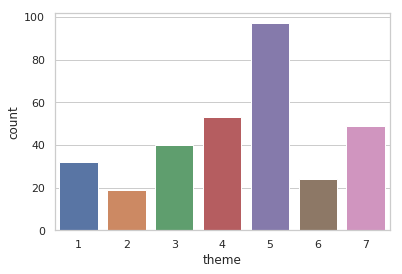

In [81]:
sns.set(style="whitegrid")
ax = sns.countplot(x="theme", data=df.loc[df['theme']!=8])

### Network visualisation
See network_analysis.py script. The betweenness centrality has been used to control the size of the nodes. Interestingly, betweenness tells a slightly different story to the count plot above. It tells us more about co-occurrences of themes across the population ('themes in common'), whereas the bar chart above doesn't take into account the likelihood that a given theme may be picked up several times in a single interview. In the network plot, the thickness of the edge correlates to the number of mentions (i.e. thick line means theme was strong in a specific interview). Processes was not the most common theme, but it was a strong theme in several interviews. Resources seems to have been the most common theme. 
### Stakeholder analysis
Analysis all of the power vs interest matrices and deriving an 'average/aggregate' version to compare with a 'typical' commercial one is interesting as it adds weight to the argument that developers tend to have more power on research software projects. This isn't necessarily bad as there was often a distinction made between 'researcher developers' and 'normal developers', the latter being less invested, however it can backfire (as in G/K). By contrast, PMs seem to have less power and interest than one might expect, which is consistent with what participants reported. The PM may be a more distant, sdministrative figure? It is not necessarily a problem not to have a very involved PM, but what is there instead? Who is there to resolve problems and disputes? Funding bodies are the closest one gets to 'Sponsors' but they seem to have less power.

### Sentiment analysis
Toyed with Google NLT for sentiment analysis. May not prove particularly useful as interview transcripts are long, have many errors in them and the terminology is specialist.

In [1]:
import pickle

In [2]:
with open ('../data/sentiment/PO', 'rb') as fp:
    itemlist = pickle.load(fp)

In [6]:
df = pd.DataFrame.from_dict(itemlist).drop(columns=['sentence_scores']).drop_duplicates()
df

,magnitude,p_id,score
0,57.200001,PO,0.1


## Step 5: Discussion

Start with differences. What came out as being major differences? e.g.
+ specific expertise on teams
+ not experienced in project management
+ nature of the project
+ power distribution

## Step 6: Suggest topics for further exploration
1. Consultancy? Could help in early stages to plan a team and schedule, requirements analysis, and could be involved with recruitment? Showing this has been done could add another layer of confidence to proposals? On large consortiums consultancy might also involve an architect who can help partners to plan how parallel streams of a large software project will be integrated.
2. Team building - At start of a project and perhaps at intervals, someone independent builds and reviews team processes, reports to PI. Non-beurocratic, more about managing human interactions etc. Scaled appropriately for project. Could help PhD students and others used to working alone to prepare for more collaborative roles.
3. Out-sourcing - in some instances, could a software project be out-sourced to another entity? Like an STFC for software. What sort of projects? Maybe ones involving GUIs/general users? An inter-institutional RSE group?
4. Project management training but for software projects. Not necessarily for PIs...PIs often not the best candidates for project PM.